# Abgabe 1 - 24 April 2021 Team 08

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [ ]:
# import files, um Daten zu laden
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
# titanic.csv Datensatz laden
import io
titanic = pd.read_csv(io.BytesIO(data_to_load['titanic.csv']))

In [ ]:
# Datensatz anzeigen
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# Alter kategorisieren
age = pd.cut(titanic['age'], [0, 18, 30,40,50,60,70]) 
titanic['age2']= age

In [ ]:
# unerwarteter Zusammenhang zwischen Embark Town und Überlebensrate
titanic.pivot_table('survived','embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [ ]:
# Idee: möglicherweise beeinflussen andere Merkmale diesen Zusammenhang... (hier: Merkmal 'sex')
titanic.pivot_table('survived',['sex'], 'embark_town', margins=True)

embark_town,Cherbourg,Queenstown,Southampton,All
sex,,,,
female,0.876712,0.750000,0.689655,0.740385
male,0.305263,0.073171,0.174603,0.188908
All,0.553571,0.389610,0.336957,0.382452


In [ ]:
# Idee: möglicherweise beeinflussen andere Merkmale diesen Zusammenhang... (hier: Merkmal 'class')
titanic.pivot_table('survived',['class'], 'embark_town', margins=True)

embark_town,Cherbourg,Queenstown,Southampton,All
class,,,,
First,0.694118,0.500000,0.582677,0.626168
Second,0.529412,0.666667,0.463415,0.472826
Third,0.378788,0.375000,0.189802,0.242363
All,0.553571,0.389610,0.336957,0.382452


In [ ]:
# Idee: möglicherweise beeinflussen andere Merkmale diesen Zusammenhang... (hier: Merkmal 'age2')
titanic.pivot_table('survived', 'age2', 'embark_town', margins=True)

embark_town,Cherbourg,Queenstown,Southampton,All
age2,,,,
"(0, 18]",0.714286,0.375000,0.456311,0.503597
"(18, 30]",0.586957,0.500000,0.300926,0.355556
"(30, 40]",0.560000,0.142857,0.434426,0.441558
"(40, 50]",0.625000,0.000000,0.338235,0.383721
"(50, 60]",0.666667,0.000000,0.310345,0.404762
"(60, 70]",0.000000,0.000000,0.214286,0.187500
All,0.617188,0.296296,0.362319,0.405941


In [ ]:
# Hypothese: die Variablen Geschlecht, Klasse und Alter stehen in Zusammenhang mit der Überlebensrate
# Hypothese überprüfen: Ist die Abhängigkeit von Embark Town und Überleben kausal oder ist es ein indirekter Zusammenhang aufgrund von Alter, Klasse oder Geschlecht?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8614565c90>,
      dtype=object)

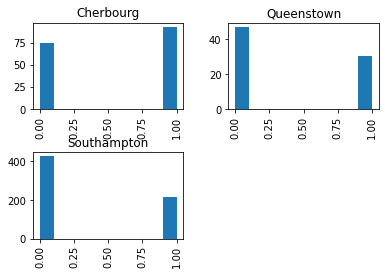

In [ ]:
titanic.hist(column='survived', by='embark_town')

In [ ]:
# Hypothese: Passagiere aus Cherbourg haben eher überlebt

In [ ]:
# Überprüfen, was für Passagiere in Cherbourg (Alter, Klasse, Geschlecht) eingestiegen sind
titanic.pivot_table('pclass', 'survived', ['embark_town', 'sex'], aggfunc ='count', margins=True)

embark_town Cherbourg      Queenstown      Southampton       All
sex            female male     female male      female male     
survived                                                        
0                   9   66          9   38          63  364  549
1                  64   29         27    3         140   77  340
All                73   95         36   41         203  441  889

In [ ]:
titanic.pivot_table('survived', ['embark_town', 'sex'], margins=True)

survived
embark_town sex             
Cherbourg   female  0.876712
            male    0.305263
Queenstown  female  0.750000
            male    0.073171
Southampton female  0.689655
            male    0.174603
All                 0.382452

In [ ]:
# Erkenntnis: in Cherbourg haben im Verhältnis zu den anderen embark towns am meisten Frauen überlebt

In [ ]:
titanic.pivot_table('pclass', 'survived', ['embark_town', 'class'], aggfunc ='count', margins=True)

embark_town Cherbourg              Queenstown  ... Southampton               All
class           First Second Third      First  ...       First Second Third     
survived                                       ...                              
0                  26      8    41          1  ...          53     88   286  549
1                  59      9    25          1  ...          74     76    67  340
All                85     17    66          2  ...         127    164   353  889

[3 rows x 10 columns]

In [ ]:
titanic.pivot_table('survived', ['embark_town', 'class'], margins=True)

survived
embark_town class           
Cherbourg   First   0.694118
            Second  0.529412
            Third   0.378788
Queenstown  First   0.500000
            Second  0.666667
            Third   0.375000
Southampton First   0.582677
            Second  0.463415
            Third   0.189802
All                 0.382452

In [ ]:
# Erkenntnis: in Cherbourg haben im Verhältnis am meisten Passagiere der 1. Klasse überlebt

In [ ]:
titanic.pivot_table('pclass', 'survived', ['embark_town', 'age2'], aggfunc ='count', margins=True)

embark_town Cherbourg                    ... Southampton           All
age2          (0, 18] (18, 30] (30, 40]  ...    (50, 60] (60, 70]     
survived                                 ...                          
0                 8.0     19.0     11.0  ...        20.0     11.0  420
1                20.0     27.0     14.0  ...         9.0      3.0  287
All              28.0     46.0     25.0  ...        29.0     14.0  707

[3 rows x 19 columns]

In [ ]:
titanic.pivot_table('survived', ['embark_town', 'age2'], margins=True)

survived
embark_town age2              
Cherbourg   (0, 18]   0.714286
            (18, 30]  0.586957
            (30, 40]  0.560000
            (40, 50]  0.625000
            (50, 60]  0.666667
            (60, 70]  0.000000
Queenstown  (0, 18]   0.375000
            (18, 30]  0.500000
            (30, 40]  0.142857
            (40, 50]  0.000000
            (50, 60]  0.000000
            (60, 70]  0.000000
Southampton (0, 18]   0.456311
            (18, 30]  0.300926
            (30, 40]  0.434426
            (40, 50]  0.338235
            (50, 60]  0.310345
            (60, 70]  0.214286
All                   0.405941

In [ ]:
# Erkenntnis: in Cherbourg haben im Verhältnis am meisten Passagiere der Altersklasse 0-18 überlebt, aber Fallzahlen sind zu gering, um nennenswerte Aussage treffen zu können

In [ ]:
titanic.pivot_table('pclass', 'survived', ['embark_town', 'class', 'sex'], aggfunc ='count', margins=True)

embark_town Cherbourg                            ... Southampton                      All
class           First       Second        Third  ...      Second        Third            
sex            female  male female  male female  ...      female  male female   male     
survived                                         ...                                     
0                 1.0  25.0    NaN   8.0    8.0  ...         6.0  82.0   55.0  231.0  549
1                42.0  17.0    7.0   2.0   15.0  ...        61.0  15.0   33.0   34.0  340
All              43.0  42.0    7.0  10.0   23.0  ...        67.0  97.0   88.0  265.0  889

[3 rows x 19 columns]

Ergebnis: aufgrund der Zusammenhänge zwischen Klasse und Geschlecht mit der Überlebensrate und dem Embark Town kann davon ausgegangen werden, dass der Zusammenhang zwischen Embark Town und Überlebensrate durch den Zusammenhang zwischen Geschlecht und Überlebensrate bzw. Klasse und Überlebensrate beschrieben werden kann